In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# import the dataset
dataset from https://www.kaggle.com/datasets/arashnic/imbalanced-data-practice

In [3]:
df_train = pd.read_csv('aug_train.csv')
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [4]:
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
id                      382154 non-null int64
Gender                  382154 non-null object
Age                     382154 non-null int64
Driving_License         382154 non-null int64
Region_Code             382154 non-null float64
Previously_Insured      382154 non-null int64
Vehicle_Age             382154 non-null object
Vehicle_Damage          382154 non-null object
Annual_Premium          382154 non-null float64
Policy_Sales_Channel    382154 non-null float64
Vintage                 382154 non-null int64
Response                382154 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


id                       0.132287
Age                      0.696880
Driving_License        -22.925381
Region_Code             -0.117003
Previously_Insured       0.043281
Annual_Premium           1.720451
Policy_Sales_Channel    -0.893456
Vintage                  0.004005
Response                 1.816735
dtype: float64


/Users/junqingzhu/opt/anaconda3/envs/combustion/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/junqingzhu/opt/anaconda3/envs/combustion/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/junqingzhu/opt/anaconda3/envs/combustion/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not 

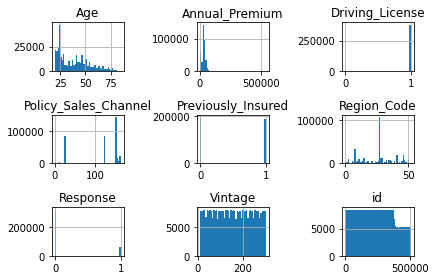

In [6]:
print(df_train.skew())
df_train.hist(bins = 50)
plt.tight_layout()
plt.show()

# Exploratory Data Analysis and Feature Selection

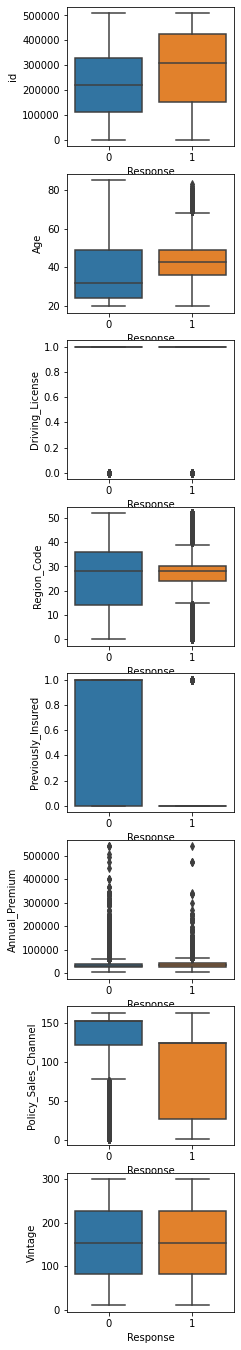

In [7]:
# boxplot of numerical values vs Response
num_cols = list(df_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols.remove('Response')
fig, ax = plt.subplots(len(num_cols), 1, figsize = (3, 3*len(num_cols)))
for i in range(len(num_cols)):
    sns.boxplot(x = 'Response', y = num_cols[i], data = df_train, ax = ax[i])

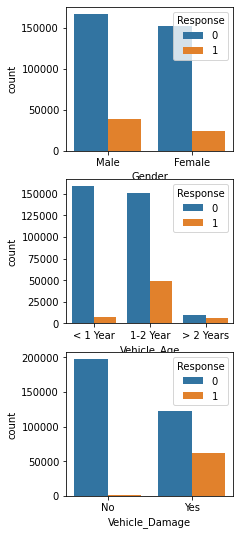

In [8]:
# countplots of categorical values vs Response
from scipy.stats import chi2_contingency

obj_cols = list(df_train.select_dtypes(include=['object']).columns)
fig, ax = plt.subplots(len(obj_cols), 1, figsize = (3, 3*len(obj_cols)))
dict_p = {}
for i in range(len(obj_cols)):
    sns.countplot(x = obj_cols[i], hue = 'Response', data = df_train, ax = ax[i])
    # chi-square test
    contigency = pd.crosstab(df_train['Response'], df_train[obj_cols[i]])
    chi2, p, dof, expected = chi2_contingency(contigency)
    dict_p[obj_cols[i]] = [chi2, p, dof]

In [9]:
# all the obj_cols are related to Response because of the near-zero p-values
df_chi2 = pd.DataFrame(dict_p, index = ['test_stat', 'p-value', 'dof'])
df_chi2

,Gender,Vehicle_Age,Vehicle_Damage
test_stat,1709.731398,32795.549104,76924.0385
p-value,0.000000,0.000000,0.0000
dof,1.000000,2.000000,1.0000


In [10]:
# filter out the outliers using iqr
q1 = np.percentile(df_train['Annual_Premium'], 25)
q2 = np.percentile(df_train['Annual_Premium'], 50)
q3 = np.percentile(df_train['Annual_Premium'], 75)
iqr = q3 - q1
low_lim = q1-1.5*iqr
high_lim = q3+1.5*iqr
df_train[(df_train['Annual_Premium'] >= low_lim) & (df_train['Annual_Premium'] <= high_lim)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...,...
382148,89317,Male,47,1,43.0,0,1-2 Year,Yes,32774.0,124.0,105,0
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0


In [11]:
print('fraction of missing value:\n', df_train.isnull().sum()/len(df_train))

fraction of missing value:
 id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64


In [12]:
feature_col = []
no_feature_col = []
# filter out the features with high cardinality
for i in df_train.columns:
    if len(df_train[i].unique()) < len(df_train[i])/2:
        feature_col.append(i)
    else:
        no_feature_col.append(i)
# remove features based on exploratory data analysis
feature_col.remove('Vintage')
no_feature_col.append('Vintage')
print('feature columns are: \n', feature_col)
print('excluded columns are: \n', no_feature_col)

feature columns are: 
 ['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Response']
excluded columns are: 
 ['id', 'Vintage']


In [13]:
df_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...,...
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0


In [14]:
object_col = df_train.select_dtypes(include = ['object']).columns
print('encoded columns are:\n', list(object_col))

encoded columns are:
 ['Gender', 'Vehicle_Age', 'Vehicle_Damage']


In [15]:
label_train = df_train.copy()
label_train[object_col] = label_train[object_col].apply(LabelEncoder().fit_transform)
label_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,1,22,1,7.0,1,1,0,2630.0,152.0,16,0
1,17163,1,42,1,28.0,0,0,1,43327.0,26.0,135,0
2,32023,0,66,1,33.0,0,0,1,35841.0,124.0,253,0
3,87447,0,22,1,33.0,0,1,0,27645.0,152.0,69,0
4,501933,1,28,1,46.0,1,1,0,29023.0,152.0,211,0


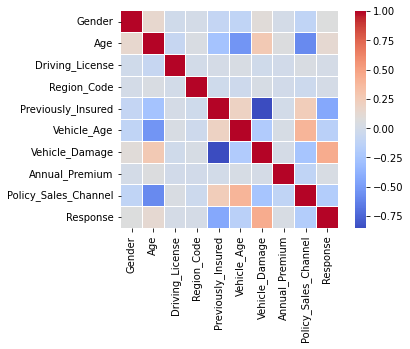

In [16]:
corr = label_train[feature_col].corr()
sns.heatmap(corr, linewidths = 0.1, cmap = 'coolwarm', square = True)
plt.show()

In [17]:
target_col = 'Response'
corr[target_col].sort_values(ascending = False)

Response                1.000000
Vehicle_Damage          0.448661
Age                     0.133149
Gender                  0.066895
Annual_Premium          0.030777
Driving_License         0.013250
Region_Code             0.011289
Vehicle_Age            -0.150993
Policy_Sales_Channel   -0.184514
Previously_Insured     -0.431224
Name: Response, dtype: float64

# handle the imbalanced target labels

In [18]:
class_0 = label_train[label_train[target_col] == 0]
count_0 = len(class_0)
class_1 = label_train[label_train[target_col] == 1]
count_1 = len(class_1)
print('class 0 has {} and class 1 has {}'.format(count_0, count_1))

class 0 has 319553 and class 1 has 62601


In [19]:
class_1_over = class_1.sample(count_0, replace = True)
label_train_over = pd.concat([class_0, class_1_over], axis = 0)
print('class 0 has {} and oversampled class 1 has {}'.format(count_0, len(class_1_over)))

class 0 has 319553 and oversampled class 1 has 319553


In [20]:
label_train_over

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,1,22,1,7.0,1,1,0,2630.0,152.0,16,0
1,17163,1,42,1,28.0,0,0,1,43327.0,26.0,135,0
2,32023,0,66,1,33.0,0,0,1,35841.0,124.0,253,0
3,87447,0,22,1,33.0,0,1,0,27645.0,152.0,69,0
4,501933,1,28,1,46.0,1,1,0,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...,...
118821,471724,0,28,1,35.0,0,1,1,2630.0,156.0,250,1
155634,309040,0,35,1,28.0,0,0,1,38813.0,124.0,203,1
25733,175815,1,57,1,28.0,0,0,1,32183.0,30.0,288,1
177499,332737,1,64,1,35.0,0,2,1,29547.0,124.0,53,1


In [21]:
feature_col.remove(target_col)
y = label_train_over[target_col]
X = label_train_over[feature_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 0)

In [22]:
X_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel
351286,1,29,1,28.0,0,1,1,39523.0,152.0
167944,0,52,1,28.0,0,0,1,32939.0,26.0
159653,0,47,1,4.0,0,0,1,43442.0,26.0
346195,1,51,1,7.0,0,0,1,2630.0,156.0
282285,1,47,1,28.0,0,0,1,2630.0,26.0


In [23]:
y_train.head()

351286    1
167944    1
159653    1
346195    0
282285    1
Name: Response, dtype: int64

# build a random forest model

In [24]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 0).fit(X_train, y_train)
test_predict = clf.predict(X_test)
print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     79879
           1       0.87      0.99      0.93     79898

    accuracy                           0.92    159777
   macro avg       0.93      0.92      0.92    159777
weighted avg       0.93      0.92      0.92    159777



[[68404 11475]
 [ 1079 78819]]


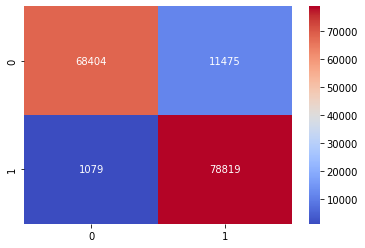

In [25]:
cm = confusion_matrix(y_test, test_predict)
print(cm)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'coolwarm')
plt.show()

In [26]:
def plot_ROC_curve(clf, label_X_train, label_X_test, y_train, y_test):
    # Make predictions
    train_true = y_train.values
    test_true = y_test.values
    train_pred = clf.predict(label_X_train)
    test_pred = clf.predict(label_X_test)

    train_fpr, train_tpr, _ = roc_curve(train_true, train_pred)
    test_fpr, test_tpr, _ = roc_curve(test_true, test_pred)
    train_auc = round(auc(train_fpr, train_tpr), 3)
    test_auc = round(auc(test_fpr, test_tpr), 3)

    # plot ROC curve
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
    ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
    ax.plot(train_fpr, train_fpr, 'k--', label='Chance Curve')
    ax.set_xlabel('False Positive Rate', fontsize=12)
    ax.set_ylabel('True Positive Rate', fontsize=12)
    ax.grid(True)
    ax.legend(fontsize=12)
    plt.show()

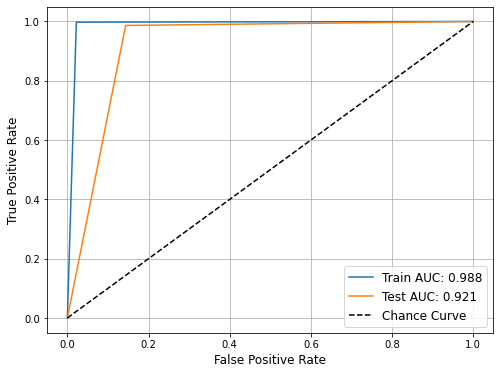

In [27]:
plot_ROC_curve(clf, X_train, X_test, y_train, y_test)

In [28]:
def plot_feature_importances(clf, label_X_train):
    importance = pd.DataFrame(data = {'name': label_X_train.columns,
                                      'feature_importances': clf.feature_importances_})
    importance.sort_values(by = 'feature_importances', ascending = False, inplace = True)
    sns.barplot(x='feature_importances', y='name', data=importance)
    plt.tight_layout()
plt.show()


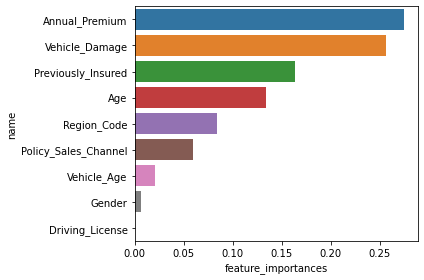

In [29]:
plot_feature_importances(clf, X_train)

# validation with the test dataset

In [30]:
sub = pd.read_csv('sample_submission.csv')
sub.head()

,id,Response
0,57782,0.5
1,286811,0.5
2,117823,0.5
3,213992,0.5
4,324756,0.5


In [31]:
df_test = pd.read_csv('aug_test.csv')
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,57782,Female,34,1,39.0,1,1-2 Year,No,38244.0,124.0,146
1,286811,Female,55,1,28.0,0,> 2 Years,Yes,37577.0,122.0,109
2,117823,Male,39,1,28.0,1,1-2 Year,No,24578.0,26.0,63
3,213992,Male,28,1,50.0,1,1-2 Year,No,40507.0,8.0,129
4,324756,Female,24,1,10.0,0,< 1 Year,Yes,36783.0,152.0,201


In [32]:
label_test = df_test.copy()
label_test[object_col] = label_test[object_col].apply(LabelEncoder().fit_transform)
label_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,57782,0,34,1,39.0,1,0,0,38244.0,124.0,146
1,286811,0,55,1,28.0,0,2,1,37577.0,122.0,109
2,117823,1,39,1,28.0,1,0,0,24578.0,26.0,63
3,213992,1,28,1,50.0,1,0,0,40507.0,8.0,129
4,324756,0,24,1,10.0,0,1,1,36783.0,152.0,201


In [33]:
X = label_test[feature_col]

In [34]:
test_predict = clf.predict(X)
test_predict

array([0, 1, 0, ..., 0, 0, 0])

In [35]:
y = label_train[target_col]
X = label_train[feature_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 0)

In [36]:
test_predict = clf.predict(X_test)
print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     79789
           1       0.79      0.99      0.88     15750

    accuracy                           0.95     95539
   macro avg       0.89      0.97      0.92     95539
weighted avg       0.96      0.95      0.96     95539



[[75568  4221]
 [  201 15549]]


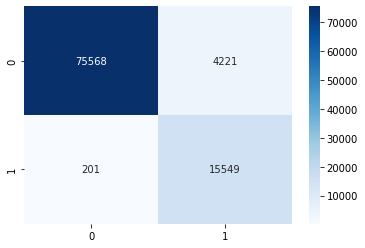

In [37]:
cm = confusion_matrix(y_test, test_predict)
print(cm)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.show()